# Optimization - trigger selection and plotting

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import ocha_stratus as stratus
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter

from src.constants import *

In [20]:
blob_name = (
    f"{PROJECT_PREFIX}/processed/storm_stats/stats_with_targets2.parquet"
)
df_stats = stratus.load_parquet_from_blob(blob_name)

In [21]:
df_stats

,sid,valid_time_min,valid_time_max,wind_speed_max,wind_speed_max_landfall,q50_total,q50_total_mean_abv,q50_roll2,q50_roll2_mean_abv,q50_roll3,...,Total Affected,Total Deaths,"Total Damage, Adjusted ('000 US$)",Amount in US$,season,name,name_season,cerf_str,target,target_with_cerf
0,2000233N12316,2000-08-24 00:00:00.000040,2000-08-24 12:00:00.000040,40.0,NaN,18.190000,35.262634,18.152500,34.911701,18.189999,...,0,0,0,NaN,2000,DEBBY,Debby 2000,nan,False,False
1,2000260N15308,2000-09-19 12:00:00.000040,2000-09-20 18:00:00.000040,30.0,NaN,26.412498,68.799995,21.250000,62.718685,23.750000,...,0,0,0,NaN,2000,HELENE,Helene 2000,nan,False,False
2,2001303N13276,2001-11-04 06:00:00.000040,2001-11-05 06:00:00.000040,120.0,115.0,94.369999,214.020828,76.807495,195.712280,94.297501,...,5900012,5,165279,NaN,2001,MICHELLE,Michelle 2001,nan,True,True
3,2002258N10300,2002-09-19 18:00:00.000040,2002-09-21 18:00:00.000040,110.0,75.0,78.592495,207.540146,40.644997,143.821213,56.139999,...,42500,0,37421,NaN,2002,ISIDORE,Isidore 2002,nan,False,False
4,2002265N10315,2002-09-29 00:00:00.000040,2002-10-02 00:00:00.000040,90.0,90.0,54.195000,89.869759,37.119995,67.565186,43.507500,...,281470,3,37421,NaN,2002,LILI,Lili 2002,nan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2023321N15278,2023-11-18 00:00:00.000039,2023-11-18 00:00:00.000039,30.0,NaN,3.947500,38.300976,3.947500,38.281227,3.947500,...,0,0,0,NaN,2023,UNNAMED,Unnamed 2023,False,False,False
58,2024216N20284,2024-08-02 12:00:00.000039,2024-08-04 00:00:00.000039,35.0,30.0,54.164997,103.377747,40.412502,75.217384,49.295002,...,0,0,0,NaN,2024,DEBBY,Debby 2024,False,False,False
59,2024268N17278,2024-09-25 12:00:00.000039,2024-09-25 12:00:00.000039,65.0,NaN,25.417499,116.488297,21.440001,99.156189,25.417500,...,0,0,0,NaN,2024,HELENE,Helene 2024,False,False,False
60,2024293N21294,2024-10-20 06:00:00.000039,2024-10-22 06:00:00.000039,75.0,75.0,12.205000,61.957958,9.135000,50.185165,12.029999,...,320000,10,0,3499569.0,2024,OSCAR,Oscar 2024,True,True,True


In [22]:
blob_name = f"{PROJECT_PREFIX}/processed/trigger_metrics_ibtracs_imerg.parquet"
df_results = stratus.load_parquet_from_blob(blob_name)

In [23]:
df_results

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
0,q50_total,18.190000,40.0,NaN,6,27069337,9,7,18,31,quantile,50,total
1,q50_total,18.190000,40.0,115.0,6,27069337,9,7,18,31,quantile,50,total
2,q50_total,18.190000,40.0,75.0,6,27069337,9,7,18,31,quantile,50,total
3,q50_total,18.190000,40.0,90.0,6,27069337,9,7,18,31,quantile,50,total
4,q50_total,18.190000,40.0,25.0,6,27069337,9,7,18,35,quantile,50,total
...,...,...,...,...,...,...,...,...,...,...,...,...,...
752233,q99_roll3_mean_abv,287.727478,65.0,100.0,5,23164562,8,6,12,15,mean_abv,99,roll3
752234,q99_roll3_mean_abv,287.727478,65.0,130.0,5,23164562,8,6,12,15,mean_abv,99,roll3
752235,q99_roll3_mean_abv,287.727478,65.0,30.0,5,23210058,8,6,13,18,mean_abv,99,roll3
752236,q99_roll3_mean_abv,287.727478,65.0,70.0,5,23164562,8,6,12,15,mean_abv,99,roll3


In [24]:
def get_optimal_triggers(optimize_col: str, years_triggered: int):
    df_results_rp = df_results[df_results["n_years"] == years_triggered]
    df_results_top_single_col = df_results_rp[
        df_results_rp[optimize_col] == df_results_rp[optimize_col].max()
    ]
    df_results_top_duplicates = df_results_top_single_col[
        df_results_top_single_col["impact_sum"]
        == df_results_top_single_col["impact_sum"].max()
    ]
    df_results_top = (
        df_results_top_duplicates.sort_values("rain_thresh")
        .drop_duplicates(
            subset=["wind_speed_max", "wind_speed_max_landfall", "rain_col"]
        )
        .sort_values("wind_speed_max")
        .drop_duplicates(
            subset=["rain_thresh", "wind_speed_max_landfall", "rain_col"]
        )
        .sort_values("wind_speed_max_landfall")
        .drop_duplicates(subset=["rain_thresh", "wind_speed_max", "rain_col"])
    )
    return df_results_top

In [25]:
get_optimal_triggers("target_sum", 6)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
689,q50_total,26.412498,115.0,105.0,5,22343481,6,4,6,8,quantile,50,total


In [26]:
get_optimal_triggers("target_with_cerf_sum", 6)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
148901,q50_roll3_mean_abv,79.962158,115.0,105.0,5,22289476,7,5,6,8,mean_abv,50,roll3
44987,q50_total_mean_abv,82.303337,115.0,105.0,5,22289476,7,5,6,8,mean_abv,50,total
256955,q80_roll3,73.388992,115.0,105.0,5,22289476,7,5,6,8,quantile,80,roll3
81005,q50_roll2_mean_abv,70.131157,115.0,105.0,5,22289476,7,5,6,8,mean_abv,50,roll2
225077,q80_roll2,67.569000,115.0,105.0,5,22289476,7,5,6,8,quantile,80,roll2
167945,q80_total,77.296997,115.0,105.0,5,22289476,7,5,6,8,quantile,80,total
116609,q50_roll3,20.857498,115.0,105.0,5,22289476,7,5,6,8,quantile,50,roll3
16433,q50_total,22.917500,115.0,110.0,5,22289476,7,5,6,8,quantile,50,total


In [27]:
get_optimal_triggers("cerf_sum", 6)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
148901,q50_roll3_mean_abv,79.962158,115.0,105.0,5,22289476,7,5,6,8,mean_abv,50,roll3
44987,q50_total_mean_abv,82.303337,115.0,105.0,5,22289476,7,5,6,8,mean_abv,50,total
256955,q80_roll3,73.388992,115.0,105.0,5,22289476,7,5,6,8,quantile,80,roll3
81005,q50_roll2_mean_abv,70.131157,115.0,105.0,5,22289476,7,5,6,8,mean_abv,50,roll2
225077,q80_roll2,67.569000,115.0,105.0,5,22289476,7,5,6,8,quantile,80,roll2
167945,q80_total,77.296997,115.0,105.0,5,22289476,7,5,6,8,quantile,80,total
116609,q50_roll3,20.857498,115.0,105.0,5,22289476,7,5,6,8,quantile,50,roll3
16433,q50_total,22.917500,115.0,110.0,5,22289476,7,5,6,8,quantile,50,total


In [37]:
get_optimal_triggers("target_sum", 7)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
72319,q50_roll2,18.574999,115.0,100.0,6,26262081,8,6,7,9,quantile,50,roll2
119101,q50_roll3,21.314999,115.0,100.0,6,26262081,8,6,7,9,quantile,50,roll3
10633,q50_total,27.847499,115.0,100.0,6,26262081,8,6,7,9,quantile,50,total


In [38]:
get_optimal_triggers("target_with_cerf_sum", 7)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
72319,q50_roll2,18.574999,115.0,100.0,6,26262081,8,6,7,9,quantile,50,roll2
119101,q50_roll3,21.314999,115.0,100.0,6,26262081,8,6,7,9,quantile,50,roll3
10633,q50_total,27.847499,115.0,100.0,6,26262081,8,6,7,9,quantile,50,total


In [39]:
get_optimal_triggers("cerf_sum", 7)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
72319,q50_roll2,18.574999,115.0,100.0,6,26262081,8,6,7,9,quantile,50,roll2
119101,q50_roll3,21.314999,115.0,100.0,6,26262081,8,6,7,9,quantile,50,roll3
10633,q50_total,27.847499,115.0,100.0,6,26262081,8,6,7,9,quantile,50,total


In [44]:
get_optimal_triggers("target_sum", 8)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
68672,q50_roll2,17.484999,145.0,75.0,6,26586051,8,6,8,11,quantile,50,roll2
118892,q50_roll3,21.314999,90.0,75.0,6,26586051,8,6,8,11,quantile,50,roll3
72110,q50_roll2,18.574999,90.0,75.0,6,26586051,8,6,8,11,quantile,50,roll2
10424,q50_total,27.847499,90.0,75.0,6,26586051,8,6,8,11,quantile,50,total
73172,q50_roll2,25.957497,75.0,75.0,6,26586051,8,6,8,12,quantile,50,roll2
111260,q50_roll3,31.377502,75.0,75.0,6,26586051,8,6,8,12,quantile,50,roll3


In [45]:
get_optimal_triggers("target_with_cerf_sum", 8)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
44571,q50_total_mean_abv,91.037247,115.0,90.0,6,26452081,9,7,8,10,mean_abv,50,total
270201,q80_roll3,76.439003,115.0,90.0,6,26452081,9,7,8,10,quantile,80,roll3
148899,q50_roll3_mean_abv,79.962158,115.0,90.0,6,26452081,9,7,8,10,mean_abv,50,roll3
161733,q80_total,88.023996,115.0,90.0,6,26452081,9,7,8,10,quantile,80,total
225075,q80_roll2,67.569000,115.0,90.0,6,26452081,9,7,8,10,quantile,80,roll2
81003,q50_roll2_mean_abv,70.131157,115.0,90.0,6,26452081,9,7,8,10,mean_abv,50,roll2
209433,q80_roll2,64.883003,145.0,90.0,6,26452081,9,7,8,10,quantile,80,roll2
129945,q50_roll3_mean_abv,77.877907,145.0,90.0,6,26452081,9,7,8,10,mean_abv,50,roll3
79437,q50_roll2_mean_abv,69.980583,145.0,90.0,6,26452081,9,7,8,10,mean_abv,50,roll2
167953,q80_total,77.296997,115.0,100.0,6,26452081,9,7,8,10,quantile,80,total


In [46]:
get_optimal_triggers("cerf_sum", 8)

,rain_col,rain_thresh,wind_speed_max,wind_speed_max_landfall,target_sum,impact_sum,target_with_cerf_sum,cerf_sum,n_years,n_storms,rain_agg,rain_q,rain_window
44571,q50_total_mean_abv,91.037247,115.0,90.0,6,26452081,9,7,8,10,mean_abv,50,total
270201,q80_roll3,76.439003,115.0,90.0,6,26452081,9,7,8,10,quantile,80,roll3
148899,q50_roll3_mean_abv,79.962158,115.0,90.0,6,26452081,9,7,8,10,mean_abv,50,roll3
161733,q80_total,88.023996,115.0,90.0,6,26452081,9,7,8,10,quantile,80,total
225075,q80_roll2,67.569000,115.0,90.0,6,26452081,9,7,8,10,quantile,80,roll2
81003,q50_roll2_mean_abv,70.131157,115.0,90.0,6,26452081,9,7,8,10,mean_abv,50,roll2
209433,q80_roll2,64.883003,145.0,90.0,6,26452081,9,7,8,10,quantile,80,roll2
129945,q50_roll3_mean_abv,77.877907,145.0,90.0,6,26452081,9,7,8,10,mean_abv,50,roll3
79437,q50_roll2_mean_abv,69.980583,145.0,90.0,6,26452081,9,7,8,10,mean_abv,50,roll2
167953,q80_total,77.296997,115.0,100.0,6,26452081,9,7,8,10,quantile,80,total


In [59]:
def get_triggered_storms(selected_index):
    selected_trigger = df_results.loc[selected_index]
    # print(selected_trigger)
    rain_col = selected_trigger["rain_col"]
    rain_thresh = selected_trigger["rain_thresh"]
    wind_speed_max = selected_trigger["wind_speed_max"]
    wind_speed_max_landfall = selected_trigger["wind_speed_max_landfall"]
    df_triggered = df_stats[
        (df_stats[rain_col] >= rain_thresh)
        & (
            (df_stats["wind_speed_max"] >= wind_speed_max)
            | (df_stats["wind_speed_max_landfall"] >= wind_speed_max_landfall)
        )
    ]
    return df_triggered

In [35]:
def plot_trigger_option(selected_index):
    selected_trigger = df_results.loc[selected_index]
    rain_col = selected_trigger["rain_col"]
    rain_thresh = selected_trigger["rain_thresh"]
    wind_speed_max = selected_trigger["wind_speed_max"]
    wind_speed_max_landfall = selected_trigger["wind_speed_max_landfall"]
    df_triggered = get_triggered_storms(selected_index)

    ymax = df_stats[rain_col].max() * 1.1
    xmax = df_stats["wind_speed_max"].max() * 1.1

    fig, ax = plt.subplots(dpi=200, figsize=(7, 7))

    bubble_sizes = df_stats["Total Affected"].fillna(0)
    # Optional: scale for visual clarity
    bubble_sizes_scaled = (
        bubble_sizes / bubble_sizes.max() * 5000
    )  # Adjust 300 as needed

    # Plot bubbles
    ax.scatter(
        df_stats["wind_speed_max"],
        df_stats[rain_col],
        s=bubble_sizes_scaled,
        alpha=0.3,
        color="crimson",
        edgecolor="none",
        zorder=1,
    )

    for _, row in df_stats.iterrows():
        triggered = row["sid"] in df_triggered["sid"].to_list()
        ax.annotate(
            row["name"].capitalize() + "\n" + str(row["season"]),
            (row["wind_speed_max"], row[rain_col]),
            ha="center",
            va="center",
            fontsize=6,
            color="crimson" if row["cerf"] == True else "k",
            zorder=10 if row["cerf"] else 9,
            alpha=0.8,
            fontstyle="italic" if triggered else "normal",
            fontweight="bold" if triggered else "normal",
        )

    trig_color = "gold"
    ax.axvline(
        wind_speed_max,
        color=trig_color,
        linewidth=0.5,
        zorder=0,
    )
    ax.axvline(
        wind_speed_max_landfall,
        color=trig_color,
        linewidth=0.5,
        linestyle="--",
        zorder=0,
    )
    ax.axhline(
        rain_thresh,
        color=trig_color,
        linewidth=0.5,
        zorder=0,
    )
    ax.add_patch(
        mpatches.Rectangle(
            (wind_speed_max, rain_thresh),  # bottom left
            xmax - wind_speed_max,  # width
            ymax - rain_thresh,  # height
            facecolor=trig_color,
            alpha=0.1,
            zorder=0,
        )
    )

    for cat_value, cat_name in CAT_LIMITS:
        ax.annotate(
            cat_name + " -",
            (cat_value, 0),
            fontstyle="italic",
            color="grey",
            rotation=90,
            va="top",
            ha="center",
            fontsize=8,
        )

    ax.set_ylabel(rain_col)
    ax.set_xlabel("\nMax. wind speed while in ZMA (knots)")

    ax.set_xlim(left=0, right=xmax)
    ax.set_ylim(bottom=0, top=ymax)

    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

rain_col                   q80_roll2
rain_thresh                   67.569
wind_speed_max                 115.0
wind_speed_max_landfall        105.0
target_sum                         5
impact_sum                  22289476
target_with_cerf_sum               7
cerf_sum                           5
n_years                            6
n_storms                           8
rain_agg                    quantile
rain_q                            80
rain_window                    roll2
Name: 225077, dtype: object


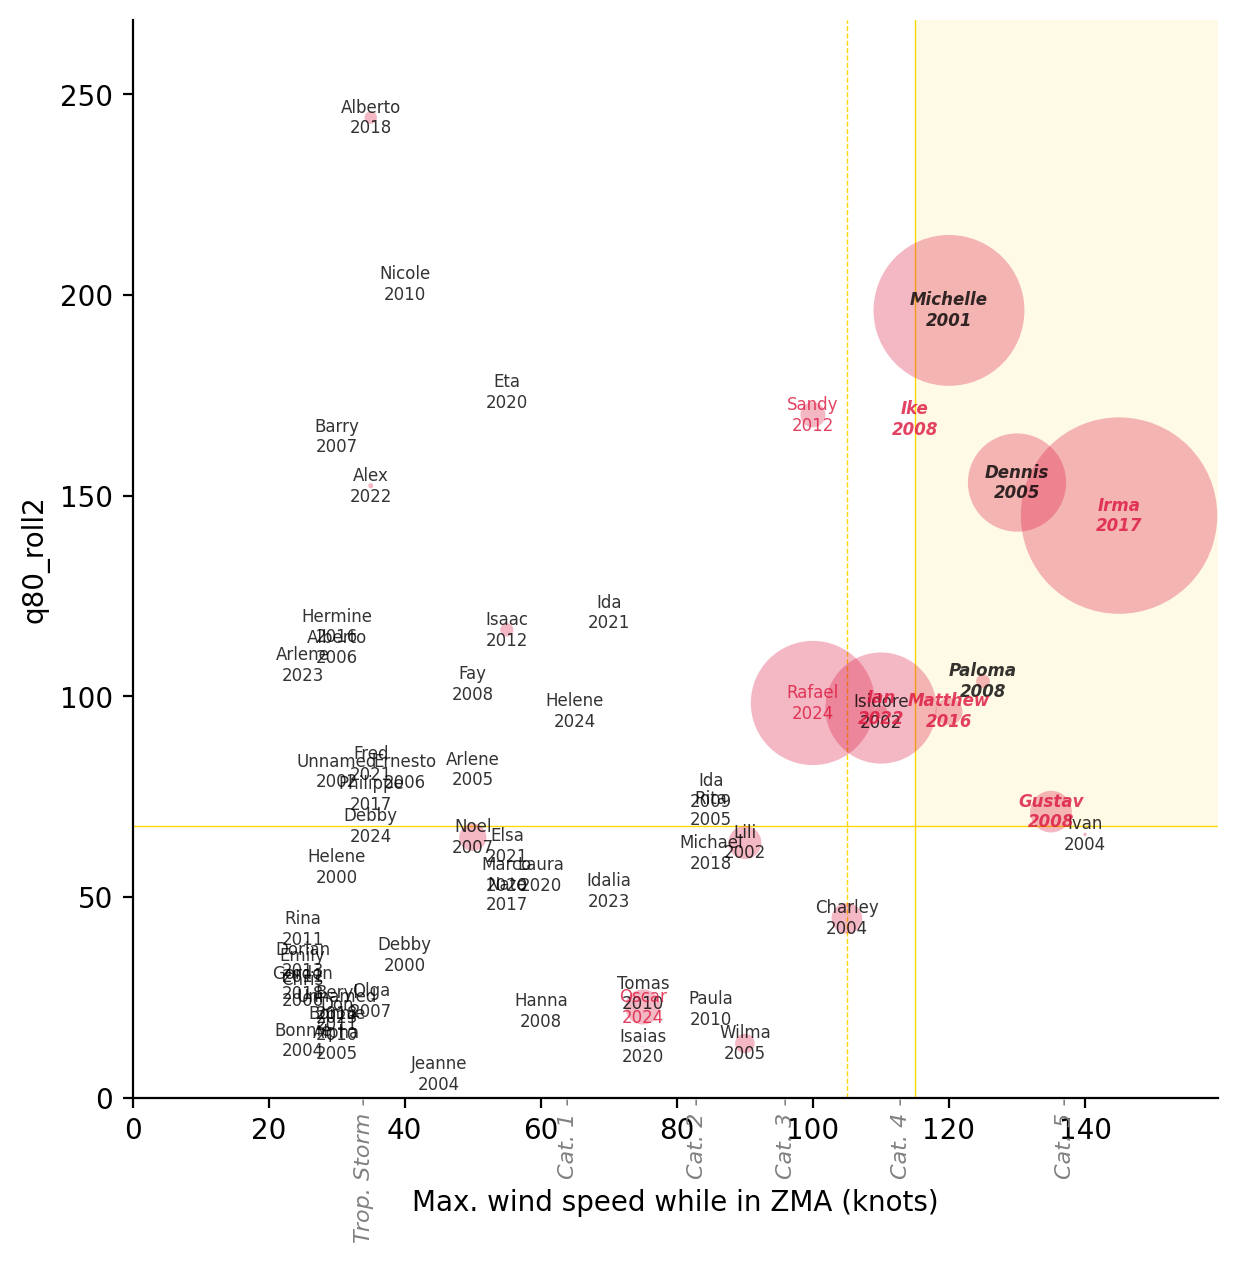

In [36]:
# 6 triggered years, target_with_cerf_sum
plot_trigger_option(225077)

rain_col                   q80_roll2
rain_thresh                98.341003
wind_speed_max                  75.0
wind_speed_max_landfall         75.0
target_sum                         4
impact_sum                  22612062
target_with_cerf_sum               5
cerf_sum                           3
n_years                            6
n_storms                           7
rain_agg                    quantile
rain_q                            80
rain_window                    roll2
Name: 226352, dtype: object


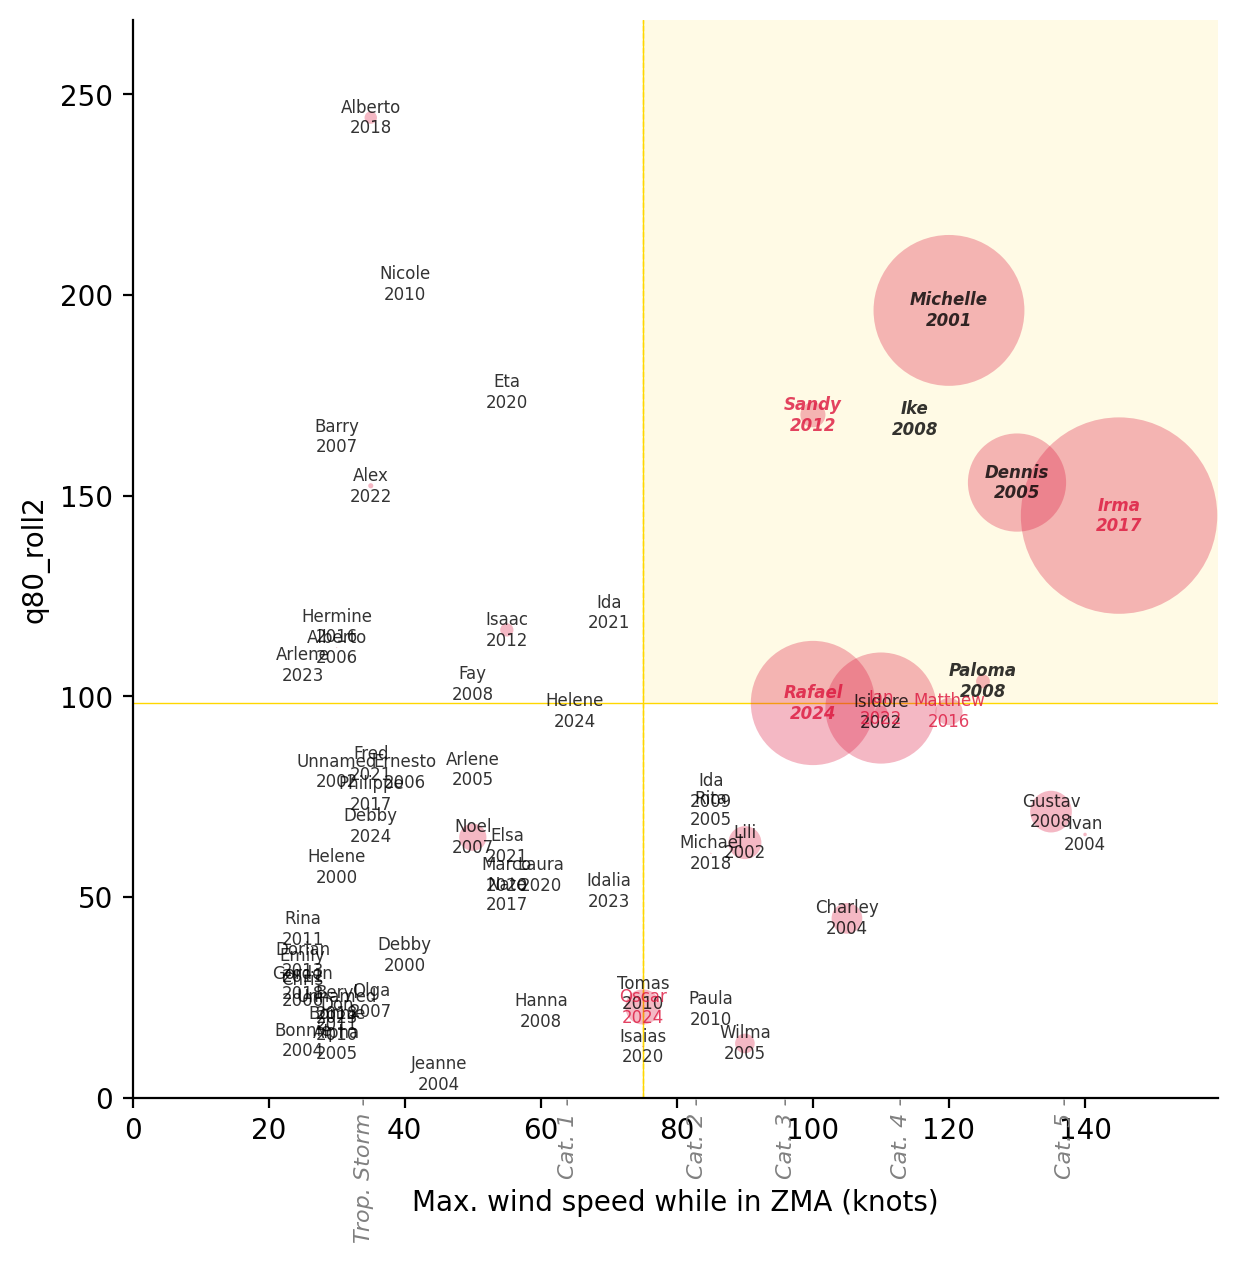

In [71]:
# 6 triggered years, cerf_sum
plot_trigger_option(226352)

rain_col                   q50_roll2
rain_thresh                18.574999
wind_speed_max                 115.0
wind_speed_max_landfall        100.0
target_sum                         6
impact_sum                  26262081
target_with_cerf_sum               8
cerf_sum                           6
n_years                            7
n_storms                           9
rain_agg                    quantile
rain_q                            50
rain_window                    roll2
Name: 72319, dtype: object


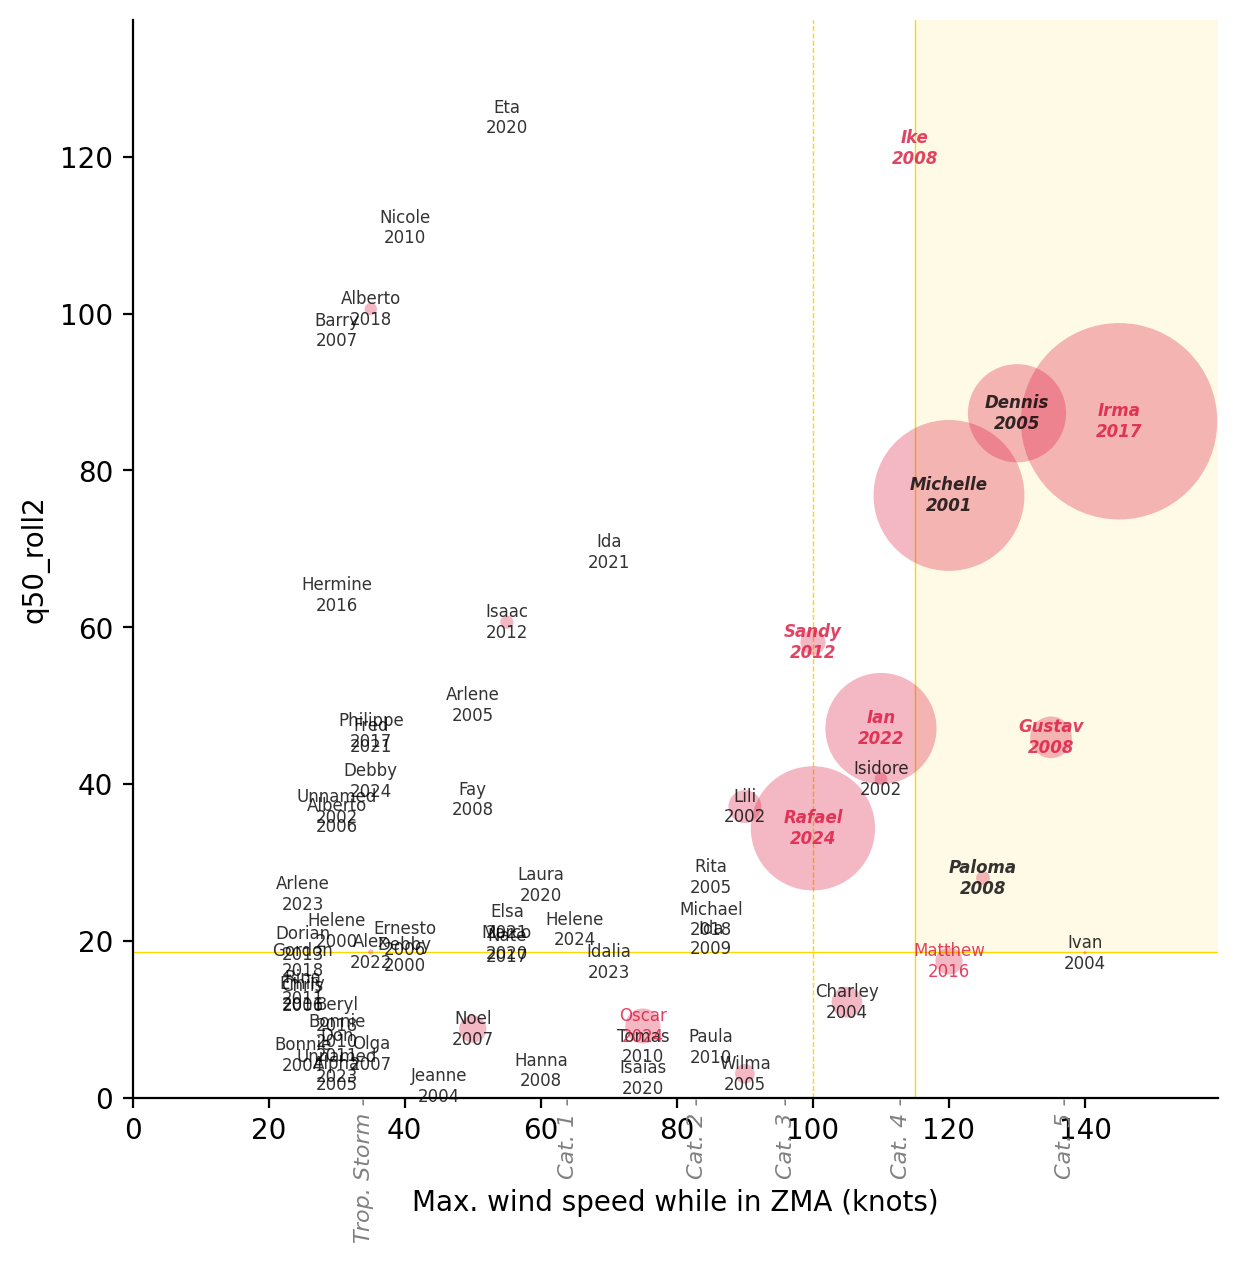

In [43]:
# 7 triggered years
plot_trigger_option(72319)

rain_col                   q80_roll2
rain_thresh                   67.569
wind_speed_max                 115.0
wind_speed_max_landfall         90.0
target_sum                         6
impact_sum                  26452081
target_with_cerf_sum               8
cerf_sum                           5
n_years                            8
n_storms                          10
rain_agg                    quantile
rain_q                            80
rain_window                    roll2
Name: 225075, dtype: object


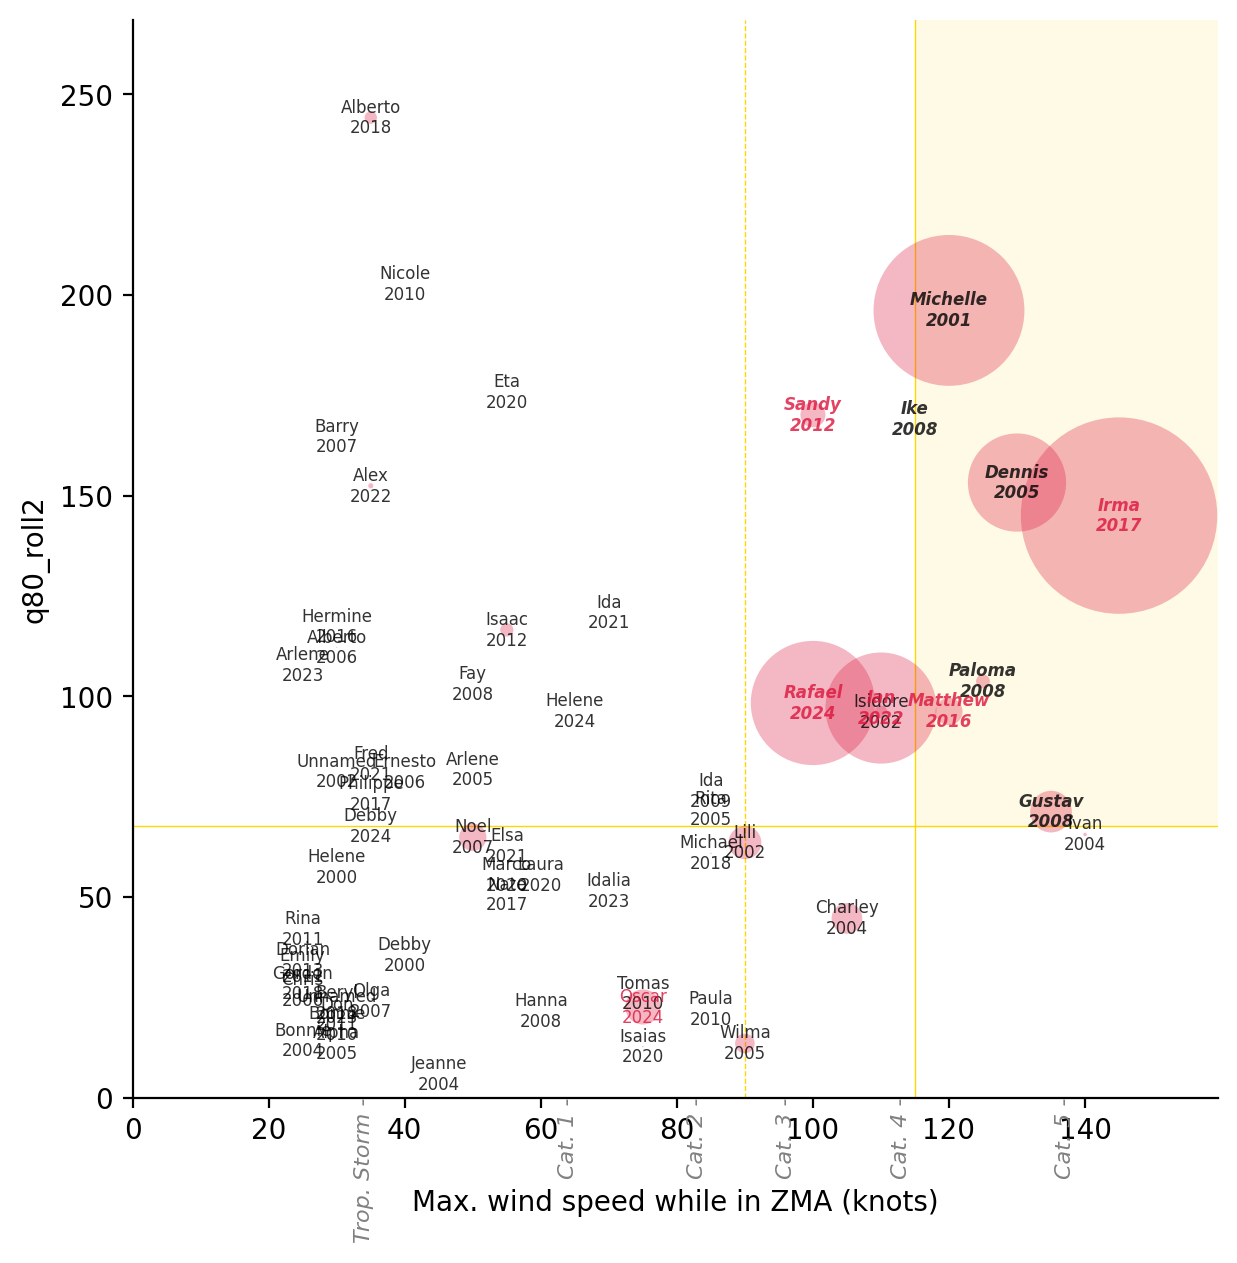

In [123]:
# 8 triggered years, target_with_cerf_sum
plot_trigger_option(225075)

rain_col                   q50_roll2
rain_thresh                25.957497
wind_speed_max                  75.0
wind_speed_max_landfall         75.0
target_sum                         6
impact_sum                  26586051
target_with_cerf_sum               7
cerf_sum                           4
n_years                            8
n_storms                          12
rain_agg                    quantile
rain_q                            50
rain_window                    roll2
Name: 73172, dtype: object


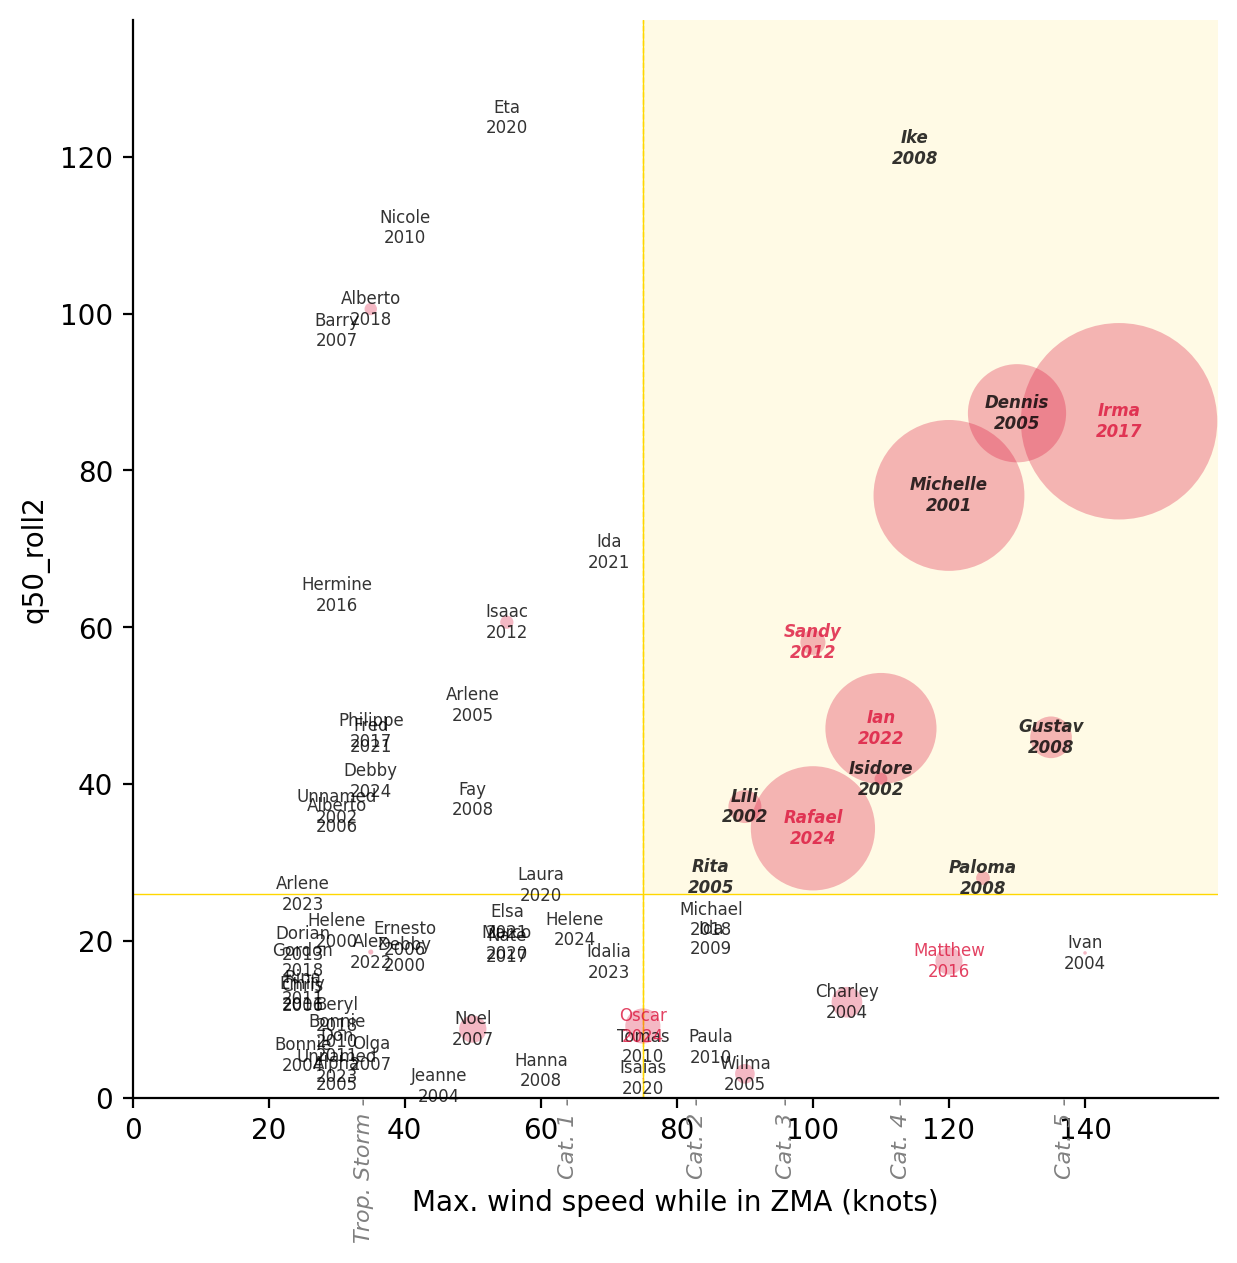

In [128]:
# 8 triggered years, target_sum
plot_trigger_option(73172)

In [35]:
df_stats

,sid,valid_time_min,valid_time_max,wind_speed_max,wind_speed_max_landfall,q50_total,q50_total_mean_abv,q50_roll2,q50_roll2_mean_abv,q50_roll3,...,q99_roll3_mean_abv,cerf,Total Affected,Amount in US$,season,name,name_season,cerf_str,target,target_with_cerf
0,2000233N12316,2000-08-24 00:00:00.000040,2000-08-24 12:00:00.000040,40.0,NaN,18.190000,35.262634,18.152500,34.911701,18.189999,...,70.882492,None,0,NaN,2000,DEBBY,Debby 2000,nan,False,False
1,2000260N15308,2000-09-19 12:00:00.000040,2000-09-20 18:00:00.000040,30.0,NaN,26.412498,68.799995,21.250000,62.718685,23.750000,...,184.656494,None,0,NaN,2000,HELENE,Helene 2000,nan,False,False
2,2001303N13276,2001-11-04 06:00:00.000040,2001-11-05 06:00:00.000040,120.0,115.0,94.369999,214.020828,76.807495,195.712280,94.297501,...,404.398499,None,5900012,NaN,2001,MICHELLE,Michelle 2001,nan,True,True
3,2002258N10300,2002-09-19 18:00:00.000040,2002-09-21 18:00:00.000040,110.0,75.0,78.592495,207.540146,40.644997,143.821213,56.139999,...,794.184509,None,42500,NaN,2002,ISIDORE,Isidore 2002,nan,False,False
4,2002265N10315,2002-09-29 00:00:00.000040,2002-10-02 00:00:00.000040,90.0,90.0,54.195000,89.869759,37.119995,67.565186,43.507500,...,183.679001,None,281470,NaN,2002,LILI,Lili 2002,nan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2023321N15278,2023-11-18 00:00:00.000039,2023-11-18 00:00:00.000039,30.0,NaN,3.947500,38.300976,3.947500,38.281227,3.947500,...,161.707001,False,0,NaN,2023,UNNAMED,Unnamed 2023,False,False,False
58,2024216N20284,2024-08-02 12:00:00.000039,2024-08-04 00:00:00.000039,35.0,30.0,54.164997,103.377747,40.412502,75.217384,49.295002,...,240.353485,False,0,NaN,2024,DEBBY,Debby 2024,False,False,False
59,2024268N17278,2024-09-25 12:00:00.000039,2024-09-25 12:00:00.000039,65.0,NaN,25.417499,116.488297,21.440001,99.156189,25.417500,...,307.214508,False,0,NaN,2024,HELENE,Helene 2024,False,False,False
60,2024293N21294,2024-10-20 06:00:00.000039,2024-10-22 06:00:00.000039,75.0,75.0,12.205000,61.957958,9.135000,50.185165,12.029999,...,533.183960,True,320000,3499569.0,2024,OSCAR,Oscar 2024,True,True,True


In [52]:
def color_df(val):
    if val == "Yes":
        return "background-color: crimson"
    elif val == "No":
        return "background-color: dodgerblue"
    elif val == "Trig.":
        return "background-color: darkorange"
    else:
        return ""

In [68]:
plot_triggers = [
    # (689, "4.3-yr RP"),
    # (226352, "4.3-yr RP"),
    (225077, "4.3-yr RP<br>"),
    (72319, "3.7-yr RP<br>"),
    (225075, "3.3-yr RP"),
    # (73172, "3.3-yr RP<br>[B]"),
]

In [69]:
df_disp = df_stats.copy()
df_disp = df_disp.rename(columns={"cerf_str": "CERF", "name_season": "Storm"})
df_disp = df_disp.set_index("Storm")
df_disp["CERF"] = df_disp["CERF"].replace(
    {"True": "Yes", "False": "No", "nan": "pre-CERF"}
)


for trig_index, trig_name in plot_triggers:
    df_triggered = get_triggered_storms(trig_index)
    df_disp[trig_name] = (
        df_disp["sid"]
        .isin(df_triggered["sid"].to_list())
        .apply(lambda x: "Trig." if x else "No trig.")
    )

trig_cols = [x[1] for x in plot_triggers]

df_disp = df_disp.sort_values(["Total Affected"] + trig_cols, ascending=False)

cols = trig_cols + ["CERF", "Total Affected"]

display(
    df_disp[cols]
    .style.bar(
        subset="Total Affected",
        color="mediumpurple",
        # vmax=500000,
        props="width: 400px;",
    )
    .map(color_df)
    .set_table_styles(
        {
            "Total Affected": [
                {"selector": "th", "props": [("text-align", "left")]},
                {"selector": "td", "props": [("text-align", "left")]},
            ]
        }
    )
    .format({"Total Affected": "{:,}"})
)

,4.3-yr RP,3.7-yr RP,3.3-yr RP,CERF,Total Affected
Storm,,,,,
Irma 2017,Trig.,Trig.,Trig.,Yes,"10,000,000"
Michelle 2001,Trig.,Trig.,Trig.,pre-CERF,"5,900,012"
Rafael 2024,No trig.,Trig.,Trig.,Yes,"4,000,000"
Ian 2022,Trig.,Trig.,Trig.,Yes,"3,200,000"
Dennis 2005,Trig.,Trig.,Trig.,pre-CERF,"2,500,000"
Gustav 2008,Trig.,Trig.,Trig.,Yes,"450,019"
Oscar 2024,No trig.,No trig.,No trig.,Yes,"320,000"
Lili 2002,No trig.,No trig.,No trig.,pre-CERF,"281,470"
Charley 2004,No trig.,No trig.,No trig.,pre-CERF,"244,005"
